In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

   water_level_1  water_level_3  water_level_7  water_level_0  \
0           8.15           7.95           7.69           8.15   
1           8.13           7.88           7.62           8.15   
2           8.13           7.88           7.64           8.13   
3           7.95           7.12           7.64           8.13   
4           7.88           7.69           7.64           7.95   

   atmospheric_pressure  typhoon_center_pressure  maximum_wind_speed  \
0                 998.2                      996                 8.2   
1                 998.4                      996                10.2   
2                 999.1                      996                11.3   
3                 999.5                      996                11.9   
4                 999.5                      996                12.9   

   local_rainfall  
0             0.5  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


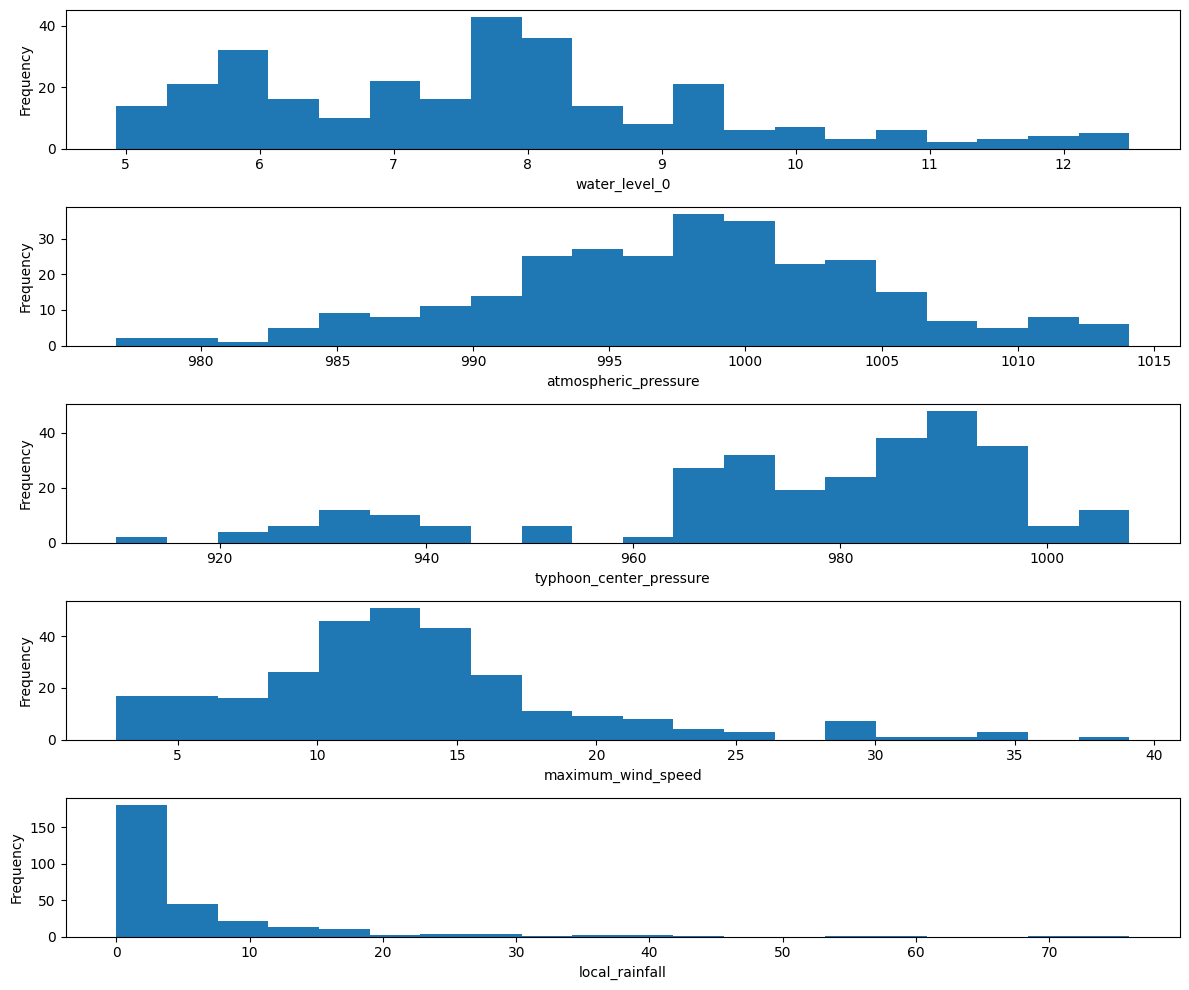

In [ ]:
# 讀取資料集
data = pd.read_csv('typhoon_data.csv')  # 假設資料集的檔案名稱為typhoon_data.csv
print(data.head())

# 提取特徵和標籤
features = data[['water_level_0', 'atmospheric_pressure', 'typhoon_center_pressure', 'maximum_wind_speed', 'local_rainfall']].values
labels = data[['water_level_1', 'water_level_3', 'water_level_7']].values

#展示每個特徵點分佈情況
# 获取特征名称列表
feature_names = ['water_level_0', 'atmospheric_pressure', 'typhoon_center_pressure', 'maximum_wind_speed', 'local_rainfall']

# 绘制每个特征的分布情况
plt.figure(figsize=(12, 10))
for i in range(features.shape[1]):
    plt.subplot(5, 1, i+1)
    plt.hist(features[:, i], bins=20)
    plt.xlabel(feature_names[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




In [ ]:
# 归一化数据
normalized_features = (features - features.mean(axis=0)) / features.std(axis=0)

# 展示归一化后的前10条数据
normalized_data = pd.DataFrame(normalized_features, columns=['water_level_0', 'atmospheric_pressure', 'typhoon_center_pressure', 'maximum_wind_speed', 'local_rainfall'])
print(normalized_data.head(10))

# 資料正規化
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
labels_scaled = scaler.fit_transform(labels)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_scaled, test_size=0.2, random_state=42)



   water_level_0  atmospheric_pressure  typhoon_center_pressure  \
0       0.288170              0.068584                 0.949656   
1       0.288170              0.097062                 0.949656   
2       0.276323              0.196736                 0.949656   
3       0.276323              0.253692                 0.949656   
4       0.169705              0.253692                 0.949656   
5       0.128242              0.239453                 0.949656   
6       0.128242              0.182497                 0.949656   
7      -0.321926              0.082823                 0.949656   
8       0.015700              0.054345                 0.949656   
9      -0.025763             -0.016850                 0.949656   

   maximum_wind_speed  local_rainfall  
0           -0.831229       -0.506764  
1           -0.503344       -0.555179  
2           -0.323007       -0.555179  
3           -0.224641       -0.555179  
4           -0.060699       -0.555179  
5            0.119638 

In [ ]:
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 建立LSTM模型
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train1.shape[1], X_train1.shape[2])))
model.add(Dense(3))  # 輸出層有3個神經元，分別對應1小時後水位、3小時後水位和7小時後水位

# 編譯模型
model.compile(optimizer='adam', loss='mse')

# 訓練模型
model.fit(X_train1, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# 進行預測
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
print(predictions_train.shape)
print(predictions_test.shape)
# 將預測結果還原為原始尺度
predictions_train = scaler.inverse_transform(predictions_train)
predictions_test = scaler.inverse_transform(predictions_test)

# 輸出預測結果
for i in range(len(predictions_test)):
    print(f'預測結果：1小時後水位={predictions_test[i][0]}, 3小時後水位={predictions_test[i][1]}, 7小時後水位={predictions_test[i][2]}')

# 輸出預測結果
for i in range(len(predictions_train)):
    print(f'預測結果：1小時後水位={predictions_train[i][0]}, 3小時後水位={predictions_train[i][1]}, 7小時後水位={predictions_train[i][2]}')


Epoch 1/100
8/8 [==============================] - 3s 53ms/step - loss: 0.1706 - val_loss: 0.1541
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1389 - val_loss: 0.1210
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1063 - val_loss: 0.0851
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0703 - val_loss: 0.0501
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0444 - val_loss: 0.0381
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0418 - val_loss: 0.0392
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0401 - val_loss: 0.0371
Epoch 8/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0387 - val_loss: 0.0373
Epoch 9/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0387 - val_loss: 0.0365
Epoch 10/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0380 - val_loss: 0.0363
Epoch 11/100
8/8 [=

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 17,091
Trainable params: 17,091
Non-trainable params: 0
_________________________________________________________________


训练集上的损失: 0.006338524166494608
RMSE: 0.07961484890706386
8/8 [==============================] - 0s 2ms/step


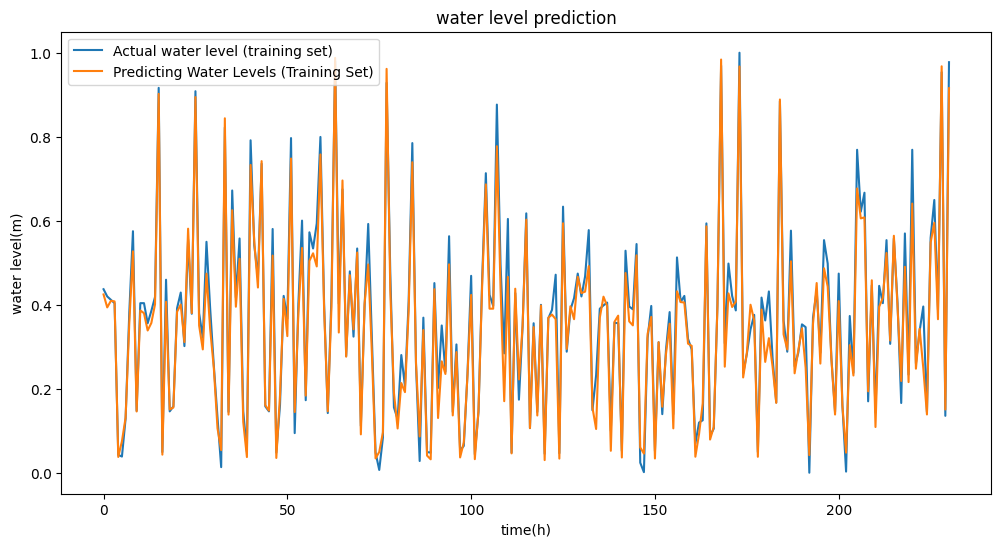

In [ ]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("训练集上的损失:", train_loss)

rmse = np.sqrt(train_loss)
print("RMSE:", rmse)

# 获取预测结果
predictions = model.predict(X_train)

# 绘制训练集和预测集的预测结果
plt.figure(figsize=(12, 6))
plt.plot(y_train[:, 0], label='Actual water level (training set)')  # 只绘制第一个水位值的预测结果
plt.plot(predictions[:, 0], label='Predicting Water Levels (Training Set)')  # 只绘制第一个水位值的预测结果
plt.xlabel('time(h)')
plt.ylabel('water level(m)')
plt.title('water level prediction')
plt.legend()
plt.show()





8/8 [==============================] - 0s 3ms/step


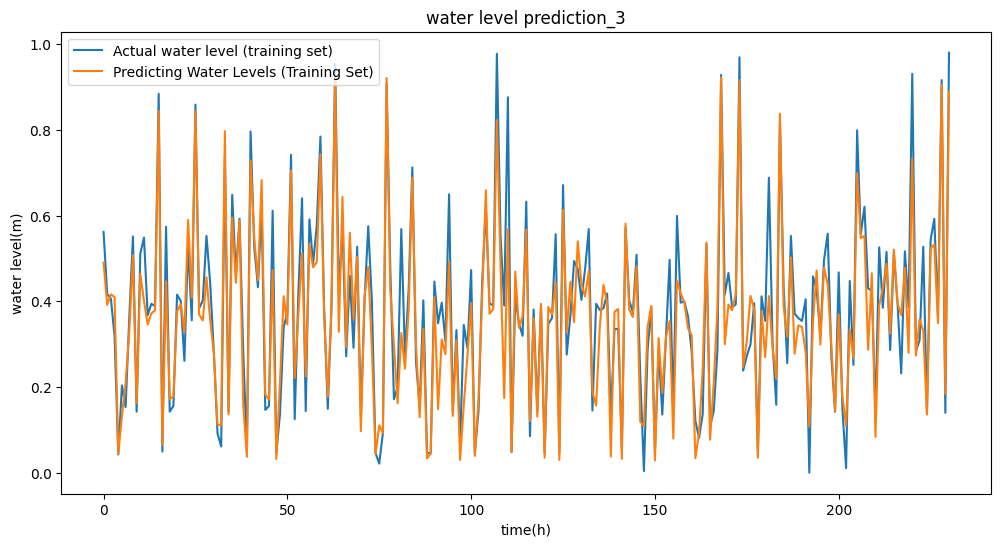

In [ ]:
# 绘制训练集和预测集的预测结果
plt.figure(figsize=(12, 6))
plt.plot(y_train[:, 1], label='Actual water level (training set)')  # 只绘制第一个水位值的预测结果
plt.plot(model.predict(X_train)[:, 1], label='Predicting Water Levels (Training Set)')  # 只绘制第一个水位值的预测结果
plt.xlabel('time(h)')
plt.ylabel('water level(m)')
plt.title('water level prediction_3')
plt.legend()
plt.show()


8/8 [==============================] - 0s 3ms/step


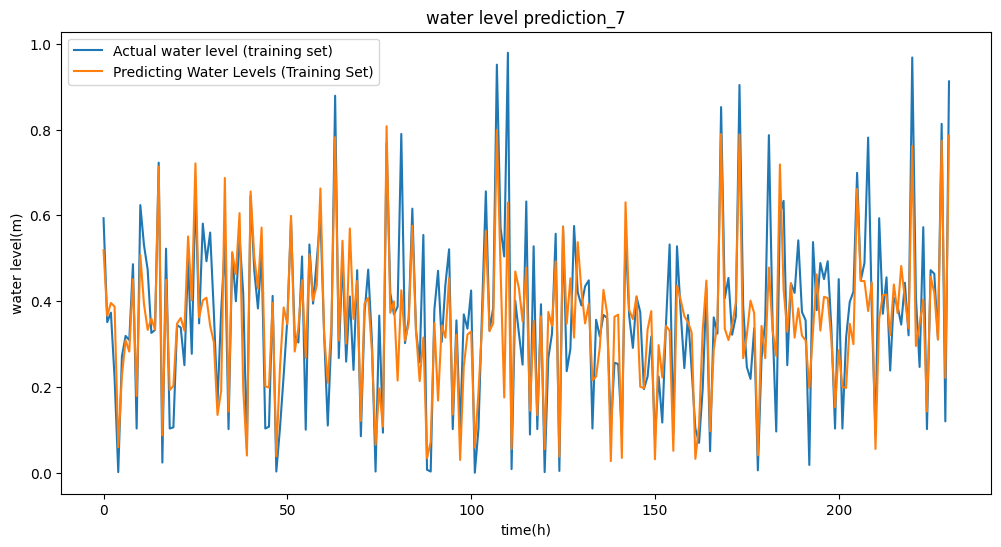

In [ ]:
# 绘制训练集和预测集的预测结果
plt.figure(figsize=(12, 6))
plt.plot(y_train[:, 2], label='Actual water level (training set)')  # 只绘制第一个水位值的预测结果
plt.plot(model.predict(X_train)[:, 2], label='Predicting Water Levels (Training Set)')  # 只绘制第一个水位值的预测结果
plt.xlabel('time(h)')
plt.ylabel('water level(m)')
plt.title('water level prediction_7')
plt.legend()
plt.show()

8/8 [==============================] - 0s 4ms/step


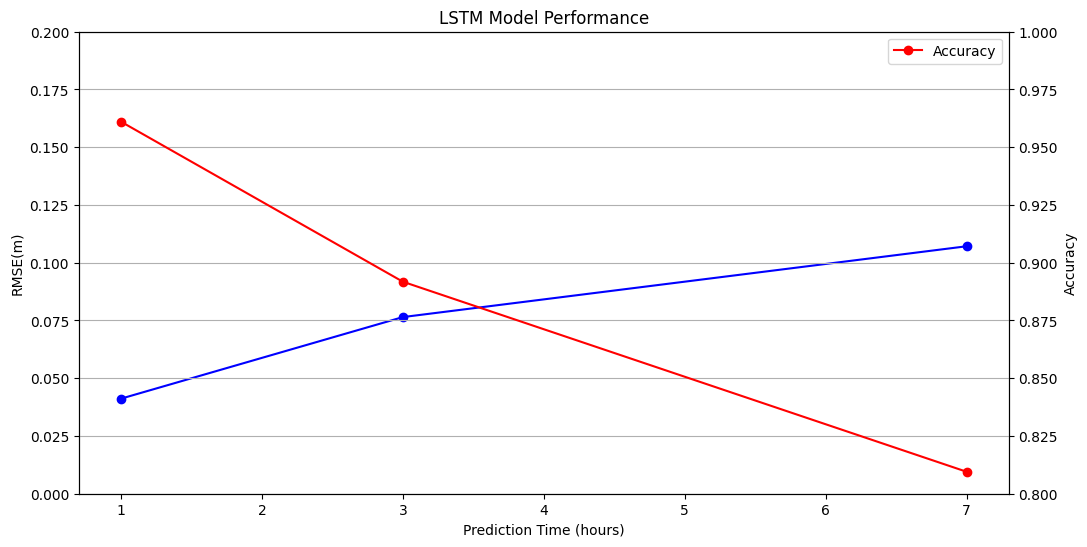

In [ ]:
# 预测水位
y_pred1 = model.predict(X_train)

# 计算不同预测时间的RMSE
rmse_1hr = np.sqrt(mean_squared_error(y_train[:, 0], y_pred1[:, 0]))
rmse_3hr = np.sqrt(mean_squared_error(y_train[:, 1], y_pred1[:, 1]))
rmse_7hr = np.sqrt(mean_squared_error(y_train[:, 2], y_pred1[:, 2]))

# 计算不同预测时间的准确度（假设设定一个阈值进行判断）
threshold = 0.3
acc_1hr = accuracy_score(y_train[:, 0] > threshold, y_pred1[:, 0] > threshold)
acc_3hr = accuracy_score(y_train[:, 1] > threshold, y_pred1[:, 1] > threshold)
acc_7hr = accuracy_score(y_train[:, 2] > threshold, y_pred1[:, 2] > threshold)

# 绘制折线图
prediction_times = [1, 3, 7]
rmse_values = [rmse_1hr, rmse_3hr, rmse_7hr]
acc_values = [acc_1hr, acc_3hr, acc_7hr]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(prediction_times, rmse_values, marker='o', label='RMSE', color='b')
ax1.set_xlabel('Prediction Time (hours)')
ax1.set_ylabel('RMSE(m)')
ax1.set_ylim(0, 0.2)

ax2 = ax1.twinx()
ax2.plot(prediction_times, acc_values, marker='o', label='Accuracy', color='r')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0.8, 1)
plt.title('LSTM Model Performance')
plt.legend()
plt.grid(True)
plt.show()


预测集上的损失: 0.006723891943693161
RMSE: 0.07961484890706386
2/2 [==============================] - 0s 8ms/step


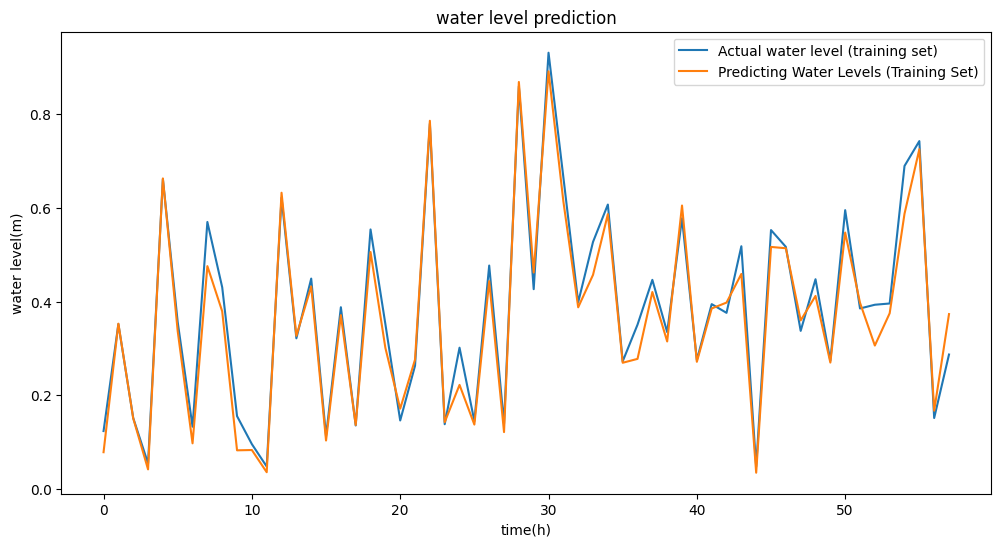

In [ ]:
# 在预测集上评估模型精确度
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("预测集上的损失:", test_loss)

rmse = np.sqrt(train_loss)
print("RMSE:", rmse)

# 绘制训练集和预测集的预测结果
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual water level (training set)')  # 只绘制第一个水位值的预测结果
plt.plot(model.predict(X_test)[:, 0], label='Predicting Water Levels (Training Set)')  # 只绘制第一个水位值的预测结果
plt.xlabel('time(h)')
plt.ylabel('water level(m)')
plt.title('water level prediction')
plt.legend()
plt.show()

预测集上的损失: 0.006723891943693161
RMSE: 0.07961484890706386
2/2 [==============================] - 0s 6ms/step


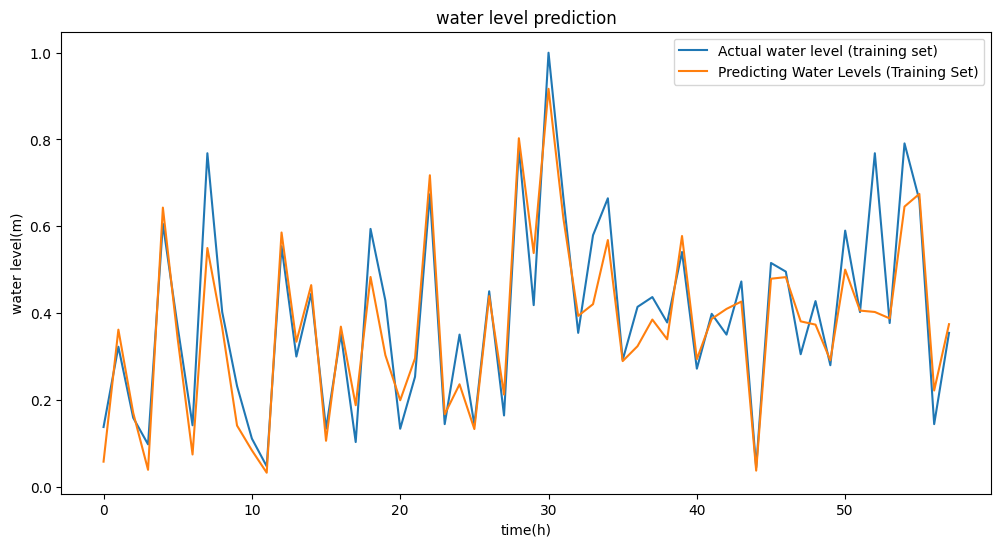

In [ ]:
# 在预测集上评估模型精确度
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("预测集上的损失:", test_loss)

rmse = np.sqrt(train_loss)
print("RMSE:", rmse)

# 绘制训练集和预测集的预测结果
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 1], label='Actual water level (training set)')  # 只绘制第一个水位值的预测结果
plt.plot(model.predict(X_test)[:, 1], label='Predicting Water Levels (Training Set)')  # 只绘制第一个水位值的预测结果
plt.xlabel('time(h)')
plt.ylabel('water level(m)')
plt.title('water level prediction')
plt.legend()
plt.show()

预测集上的损失: 0.006723891943693161
RMSE: 0.07961484890706386
2/2 [==============================] - 0s 6ms/step


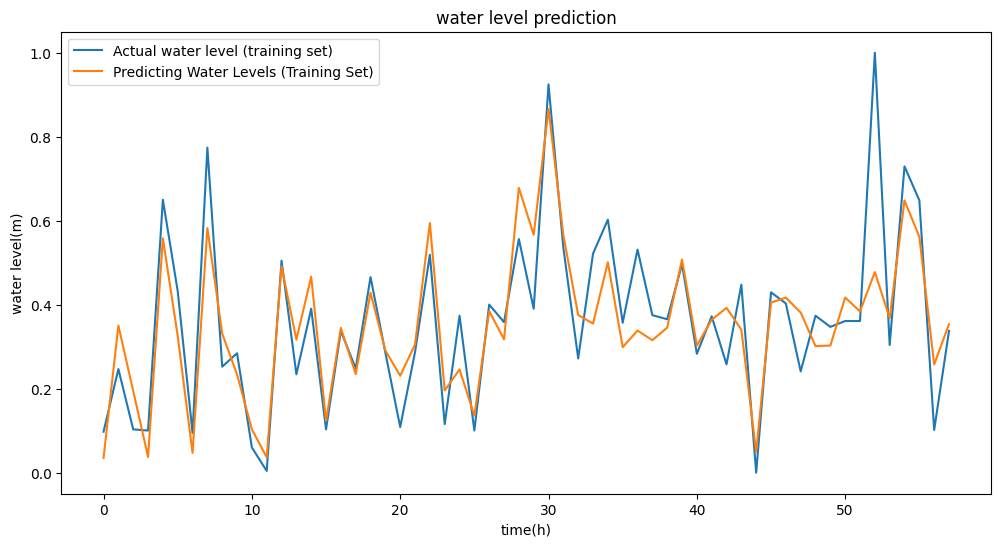

In [ ]:
# 在预测集上评估模型精确度
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("预测集上的损失:", test_loss)

rmse = np.sqrt(train_loss)
print("RMSE:", rmse)

# 绘制训练集和预测集的预测结果
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='Actual water level (training set)')  # 只绘制第一个水位值的预测结果
plt.plot(model.predict(X_test)[:, 2], label='Predicting Water Levels (Training Set)')  # 只绘制第一个水位值的预测结果
plt.xlabel('time(h)')
plt.ylabel('water level(m)')
plt.title('water level prediction')
plt.legend()
plt.show()

2/2 [==============================] - 0s 8ms/step


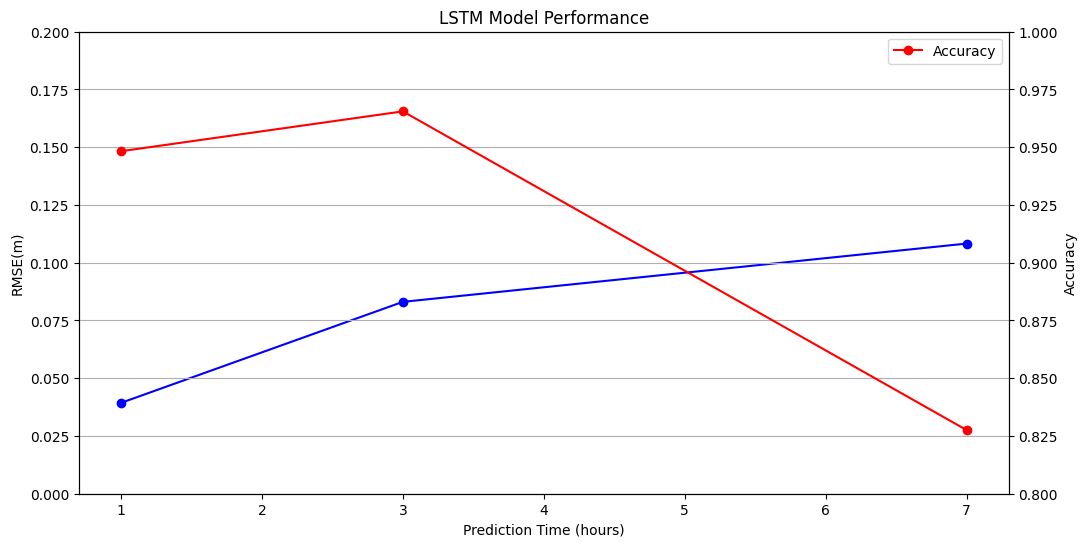

In [ ]:
# 预测水位
y_pred = model.predict(X_test)

# 计算不同预测时间的RMSE
rmse_1hr = np.sqrt(mean_squared_error(y_test[:, 0], y_pred[:, 0]))
rmse_3hr = np.sqrt(mean_squared_error(y_test[:, 1], y_pred[:, 1]))
rmse_7hr = np.sqrt(mean_squared_error(y_test[:, 2], y_pred[:, 2]))

# 计算不同预测时间的准确度（假设设定一个阈值进行判断）
threshold = 0.3
acc_1hr = accuracy_score(y_test[:, 0] > threshold, y_pred[:, 0] > threshold)
acc_3hr = accuracy_score(y_test[:, 1] > threshold, y_pred[:, 1] > threshold)
acc_7hr = accuracy_score(y_test[:, 2] > threshold, y_pred[:, 2] > threshold)

# 绘制折线图
prediction_times = [1, 3, 7]
rmse_values = [rmse_1hr, rmse_3hr, rmse_7hr]
acc_values = [acc_1hr, acc_3hr, acc_7hr]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(prediction_times, rmse_values, marker='o', label='RMSE', color='b')
ax1.set_xlabel('Prediction Time (hours)')
ax1.set_ylabel('RMSE(m)')
ax1.set_ylim(0, 0.2)

ax2 = ax1.twinx()
ax2.plot(prediction_times, acc_values, marker='o', label='Accuracy', color='r')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0.8, 1)
plt.title('LSTM Model Performance')
plt.legend()
plt.grid(True)
plt.show()







